<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/wine_quality_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009].
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).

4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods.

5. Number of Instances: red wine - 1599; white wine - 4898.

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data):
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



red=pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/ml/winequality-red.csv",delimiter=";")
white=pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/ml/winequality-white.csv",delimiter=";")

In [ ]:
wine=pd.concat([red,white],axis=1)

In [ ]:
wine.dropna(axis=1,inplace=True)

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Colinearity

There must not be any colinearity.  The high degree of correlation between **density** and **residual sugar** suggest we could drop one of them.

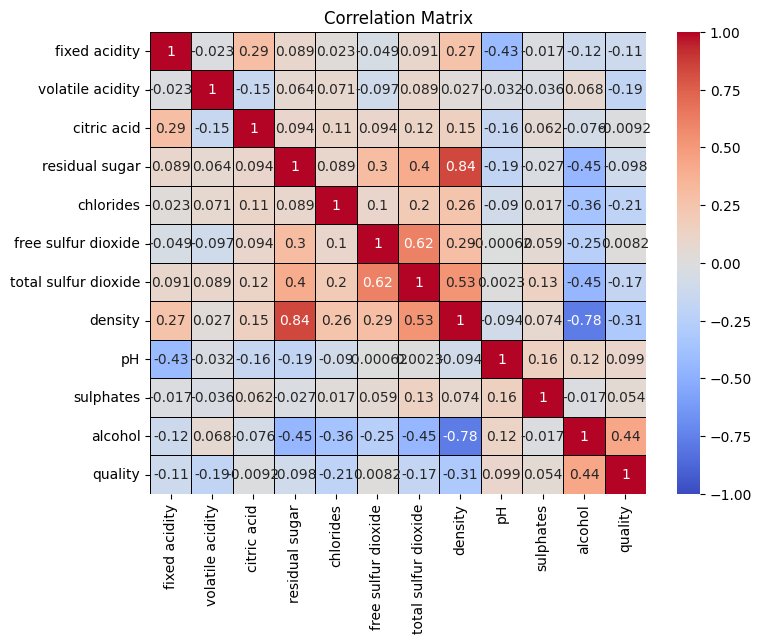

In [ ]:
import seaborn as sns

corr_matrix = wine.corr()

plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
wine = wine.drop(columns=['density'])

In [ ]:
x = wine.iloc[:, :-1].values
x

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [ ]:
x.shape

(4898, 10)

In [ ]:
y=wine.iloc[:, -1].values
y=y.reshape(-1, 1)
y

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]])

In [ ]:
assert not np.any(np.isnan(x))
assert not np.any(np.isnan(y))

In [ ]:


xtrain,xtest=np.array_split(x, 2)
ytrain,ytest=np.array_split(y, 2)


reg = LinearRegression()
reg.fit(xtrain, ytrain)



LinearRegression()

In [ ]:
np.set_printoptions(suppress=True, precision=10)

print('Coefficients: \n', reg.coef_)
print('\n Intercept: \n', reg.intercept_)


Coefficients: 
 [[-0.0630214557 -1.8122992584  0.0298038927  0.0174234814 -1.4531376608
   0.008172074  -0.0010308239  0.3241917879  0.4577239124  0.387103702 ]]

 Intercept: 
 [1.3527884665]


In [ ]:
ypred = reg.predict(xtest)



In [ ]:
ypred.shape

(2449, 1)

In [ ]:
ytest.shape

(2449, 1)

In [ ]:
np.column_stack((ytest,ypred))

array([[6.          , 6.2486063839],
       [5.          , 5.135738343 ],
       [5.          , 5.135738343 ],
       ...,
       [6.          , 5.4245914719],
       [7.          , 6.7384555436],
       [6.          , 6.4402038532]])

**Mean Squared Error (MSE)** is a statistical measure used to evaluate the accuracy of a predictive model. It calculates the average of the squared differences between the actual (observed) values and the predicted values produced by the model. The formula for MSE is:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $ n $ is the number of observations.
- $ y_i $ represents the actual values.
- $ \hat{y}_i $ represents the predicted values.


MSE is always non-negative, with a lower value indicating a better fit of the model to the data. It is particularly sensitive to large errors because the errors are squared, making it a useful metric for identifying models that might have outliers or large deviations in their predictions.


**Coefficient of Determination ($R^2$)** is a statistical measure used to evaluate the goodness of fit of a regression model. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Essentially, $R^2$ provides insight into how well the regression model explains the variability of the response data around its mean.

The formula for $R^2$ is:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

where:
- $y_i$ represents the actual values.
- $\hat{y}_i$ represents the predicted values.
- $\bar{y}$ is the mean of the actual values.
- $n$ is the number of observations.

### Interpretation
- $R^2 = 1$: The model explains all the variability of the response data.
- $R^2 = 0$: The model explains none of the variability of the response data.
- $0 < R^2 < 1$: The model explains some portion of the variability of the response data.
- $R^2 < 0$: This can occur if the model is worse than a horizontal line (mean of actual values) as a predictor, indicating a very poor fit.

### Properties
- $R^2$ is always between 0 and 1 for models that include an intercept. However, it can be negative for models that do not include an intercept, or if the model fits the data worse than a horizontal line through the mean of the actual values.
- Higher $R^2$ values indicate better fit, but they do not necessarily mean the model is good. Overfitting can lead to high $R^2$ values on the training set but poor performance on unseen data.

### Usage
$R^2$ is widely used in regression analysis to assess the performance of a model and compare different models.

In summary, the Coefficient of Determination is a crucial metric in regression analysis that quantifies how well the independent variables explain the variability of the dependent variable.


In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(ytrain, ypred))
print('Coefficient of determination: %.2f' % r2_score(ytrain, ypred))